# Shift regions intuition

**Goal:** I want to start off looking at some of the numbers in Shota's slides [https://indico.cern.ch/event/1061799/contributions/4463805/attachments/2286258/3893869/bkgd-shiftreg-v1.pdf] (that I think Rui might have presented) and see if I can notice some trends or patterns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
import uproot



import os
os.sys.path.append('../../hh4b/hh4b-plots/')
from hh4b_plots.colors import *

from hh4b_plots.hh4b_plots import get_region_set, draw_contours

os.sys.path.append('../code/')
from eventDisplays import rainbow_text


# pretty plots
dirname = os.path.dirname('../../hh4b/hh4b-plots/hh4b_plots/')
from matplotlib import font_manager
font_dirs = [os.path.join(dirname, "fonts/freesans/")]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.style.use(os.path.join(dirname, 'stylesheets/ATLAS.mplstyle'))
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


Using uproot4


In [2]:
idx = pd.MultiIndex.from_product([[16,17,18],
                                  ['UL','UC','UR','CR','LR']])
cols = pd.MultiIndex.from_product([['4b','3b1l'],
                                   ['dat','CR1','CR2']])

In [3]:
df = pd.DataFrame(0,idx,cols)

In [4]:
colors = ['deeppink','b','limegreen','mediumturquoise','orange']

In [5]:
n_4b = np.array([# 2016
                [4068, 4148.5, 5034.6],
                [2197, 2137.2, 2046.5],
                [1269, 1187.7, 1197.4],
                [1305, 1332.4, 1308.4],
                [2658, 3213.5, 2720.7],
                # 2017
                [5586, 5831.9, 6917.8],
                [3017, 3994.0, 2900.5],
                [1832, 1752.8, 1740.8],
                [1922, 2000.6, 1884.7],
                [3635, 4331.7, 3812.2],
                # 2018
                [9421, 9589.5, 11685.2],
                [5161, 5061.9, 4857.3],
                [2943, 2812.6, 2778.7],
                [3098, 3134.0, 2989.0],
                [6084, 7144.0, 6289.3]
                ])

In [6]:
n_3b1l  =  np.array([#2016
                    [4019,3990.4,4451.0],
                    [2060,2047.1,2003.6],
                    [1235,1142.9,1157.5],
                    [1216,1283.6,1263.8],
                    [2257,2819.2,2492.5],
                    #2017
                    [4785,4815.4,5446.1],
                    [2785,2649.4,2687.2],
                    [1566,1603.2,1560.9],
                    [1732,1654.5,1601.9],
                    [2886,3483.3,3017.8],
                    #2018
                    [9818,10076.5,11248.4],
                    [5306,5397.6,5068.6],
                    [2972,3070.6,2927.1],
                    [3156,3171.8,3237.1],
                    [5692,6611.2,5980.8]
                    ])

In [7]:
df['4b'] = n_4b
df['3b1l'] = n_3b1l

In [8]:
df

4b                     3b1l                  
          dat     CR1      CR2     dat      CR1      CR2
16 UL  4068.0  4148.5   5034.6  4019.0   3990.4   4451.0
   UC  2197.0  2137.2   2046.5  2060.0   2047.1   2003.6
   UR  1269.0  1187.7   1197.4  1235.0   1142.9   1157.5
   CR  1305.0  1332.4   1308.4  1216.0   1283.6   1263.8
   LR  2658.0  3213.5   2720.7  2257.0   2819.2   2492.5
17 UL  5586.0  5831.9   6917.8  4785.0   4815.4   5446.1
   UC  3017.0  3994.0   2900.5  2785.0   2649.4   2687.2
   UR  1832.0  1752.8   1740.8  1566.0   1603.2   1560.9
   CR  1922.0  2000.6   1884.7  1732.0   1654.5   1601.9
   LR  3635.0  4331.7   3812.2  2886.0   3483.3   3017.8
18 UL  9421.0  9589.5  11685.2  9818.0  10076.5  11248.4
   UC  5161.0  5061.9   4857.3  5306.0   5397.6   5068.6
   UR  2943.0  2812.6   2778.7  2972.0   3070.6   2927.1
   CR  3098.0  3134.0   2989.0  3156.0   3171.8   3237.1
   LR  6084.0  7144.0   6289.3  5692.0   6611.2   5980.8

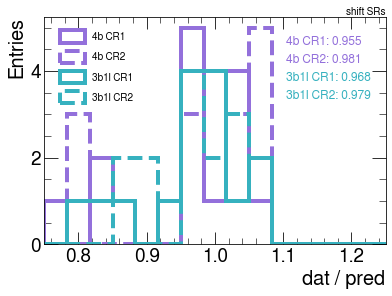

In [9]:
n = 15
r = (.75,1.25)

plt.hist(df[('4b','dat')]/df[('4b','CR1')],n,r,
         label='4b CR1',lw=4,
         histtype='step',color='mediumpurple')
plt.hist(df[('4b','dat')]/df[('4b','CR2')],n,r,
         label='4b CR2',lw=4,
         histtype='step',color='mediumpurple',ls='--')


plt.hist(df[('3b1l','dat')]/df[('3b1l','CR1')],n,r,
         label='3b1l CR1',lw=4,
         histtype='step',color='hh:medturquoise')
plt.hist(df[('3b1l','dat')]/df[('3b1l','CR2')],n,r,
         label='3b1l CR2',lw=4,
         histtype='step',color='hh:medturquoise',ls='--')

plt.legend(loc='upper left',fontsize=10,bbox_to_anchor=(.02,.98))
plt.xlabel('dat / pred',ha='right',x=1)
plt.ylabel('Entries',ha='right',y=1)

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.xlim(r)

ls = []
for bcat, i in product(['4b','3b1l'],[1,2]):

    mu = np.mean(df[(bcat,'dat')]/df[(bcat,f'CR{i}')])
    ls.append(f'{bcat} CR{i}: {mu:.3f}')

rainbow_text(1.1,4.6,ls,['mediumpurple']*2+['hh:medturquoise']*2,
             fontsize=12,yoffset=1.5)
    
plt.text(1,1,'shift SRs',ha='right',va='bottom',transform=ax.transAxes)

fig = plt.gcf()
fig.set_size_inches(6,4)
#print(fig.get_size_inches())
plt.savefig('figures/shiftSRs/yieldRatio_4b_3b1l.pdf',bbox_inches='tight')

**Question:** Is 3b + 1 loose _harder_ to model than 4b?

Interestingly, no - at least not in terms of the shape.

It seems like the problem is getting _easier_ in some sense for 3b1l compared to 4b.

I think this makes sense because we know the 3b1f is more similar to the 2b distribution than 4b.

**Note:** all of these trainings are before $X_{wt}$ though.

## How to improve

**Goal:** See if we can associate the normalization offsets with the mis-match of the means.

In [10]:
load_cols = ['m_h1','m_h2','X_wt_tag','pass_vbf_sel','ntag','minQ']

In [12]:
names = ['nom','UL','UC','UR','CR','LR']
idx2  = pd.MultiIndex.from_product([[16,17,18],
                                    names])
cols2 = pd.MultiIndex.from_product([['4b','3b1l','3b1f','2b'],
                                    ['m_h1','m_h2'],
                                    ['SR','CR1','CR2']])

# Save the means of the m_h{1,2} distributions _after_ applying the Xwt cut
postXwt = pd.DataFrame(0,idx2,cols2)

# And _before_ applying the Xwt cut
preXwt  = pd.DataFrame(0,idx2,cols2)

Ok, so to populate this table, I'm going to grab ... from Chris's post-processing scripts in his (public) eos folder:

`/eos/user/c/cgubbels/public/hh4b/writeTrees/`


In [13]:
def Xhh_func(m_h1, m_h2, m0_h1=124, m0_h2=117,res_x=0.1,res_y=0.1):
    ''' Calculates Xhh descriminant '''
    return np.sqrt(np.power((m_h1-m0_h1)/(res_x*m_h1),2)
                   +np.power((m_h2-m0_h2)/(res_y*m_h2),2))

def ell_func(x, y, x0=0, y0=0, dx=2, dy=2, theta=0):
    ''' Calculates ellipsoidal descriminant, theta in degrees, dx/dy are full width/height '''
    theta=np.radians(theta)
    return np.sqrt(np.power(((x-x0)*np.cos(theta)+(y-y0)*np.sin(theta))/(dx/2), 2)+
                   np.power(((x-x0)*np.sin(theta)-(y-y0)*np.cos(theta))/(dy/2), 2))

In [14]:
def defineKRd(data, name='kinematic_region', regnDicts=None, krMin=0):
    '''
    Defines region set `name` in data from dict of region boundaries
    
    New region is inserted as column `name` into data, region discriminants 
    are inserted with names matching keys of `regnDicts`.
    
    - `regnDicts`: one dict for each region boundary, containing keys 
                   for shape defining function (`func`) and cut (`cut`)
    '''

    data[name]=0

    for regnName, regnInfo in regnDicts.items():
        data[regnName]=regnInfo['func'](data['m_h1'],data['m_h2'],
                                        **regnInfo['kwargs'])
        data[name]+=(data[regnName]>regnInfo['cut']).astype(int)

    data[name]+=krMin

In [15]:
def defineQuadrants(df, name, center, angle=0):
    angle=np.radians(angle)
    mhr1=(df['m_h1']-center[0])*np.cos(angle)+(df['m_h2']-center[1])*np.sin(angle)
    mhr2=-(df['m_h1']-center[0])*np.sin(angle)+(df['m_h2']-center[1])*np.cos(angle)
    df[name]=(mhr1>0).astype(int)+2*(mhr2>0).astype(int)

In [16]:
def defineCQRegnSet(df, krName, CVRDict, SRDicts, qCenter, qAngle, CRqs, 
                    verbose=False, SR_varName='X_hh'):

    # Define kinematic region `krName`, SRs==0, CVR==1
    defineKRd(df,krName, 
              regnDicts={SR_varName:SRDicts['SRout'],'CVR':CVRDict})#, **SRDicts['kwargs'])
    
    # Define quadrants `krName_Q` cut on cross centered at `qCenter` and rotated by `qAngle` degrees CW
    defineQuadrants(df, f'{krName}_Q', qCenter, qAngle)
    
    # Set `krName` of events outside CVR to 3 instead of 2
    outCVR=(df[krName]==2)
    df.loc[outCVR,krName]=3
    
    # For events in the CVR and a CR quadrant (`CRqs`) set kinematic region label to 2
    inCVR=(df[krName]==1)
    df.loc[inCVR,krName]+=df.loc[inCVR,f'{krName}_Q'].isin(CRqs).astype(int)
    
    # Define SR bins variable
    defineKRd(df,'sr_bin',SRDicts)

**What's are the #s that Shota has calculated?**
- <span style="color:deeppink">upper left (UL): (78,166)</span>
- <span style="color:blue">upper center (UC): (124, 180)</span>
- <span style="color:limegreen">upper right (UR): (170, 160)</span>
- <span style="color:turquoise">center right (CR): (188, 117)</span>
- <span style="color:orange">lower right (LR): (170, 68)</span>

In [18]:
x,y = 124,117

In [28]:
for yr in [16,17,18]:
    
    print(f'Loading in 20{yr} data')
    with uproot.open(f'../data/RR/cryptotuples/data{yr}.root') as f:
        fmp = f['fullmassplane'].arrays(load_cols, library='pd')
    
    for qCenter, name in zip([(x,y),(78,166),(124,180),(170,160),(188,117),(170,68)], names):

        print('  ',name,qCenter)

        CVRinf=[qCenter[0]*1.05, qCenter[1]*1.05, 90, 90, 0]
        CVRDict={'func':lambda x,y,e=CVRinf: ell_func(x,y,*e), 'cut':1, 'kwargs':{}}
        SRDicts={'SRout':{'func':Xhh_func, 'cut':1.6, 
                          'kwargs':{'m0_h1' : qCenter[0],
                                    'm0_h2' : qCenter[1],
                                    'res_x' : x/qCenter[0]*0.1,
                                    'res_y' : y/qCenter[1]*0.1}
                         }}

        defineCQRegnSet(fmp,'kinematic_region', CVRDict, SRDicts, qCenter, 45, CRqs=[0,3])

        # Define the masks
        m_sr = ~fmp.pass_vbf_sel & (fmp.X_hh < 1.6)
        m_cr = ~fmp.pass_vbf_sel & (fmp.CVR < 1) & (fmp['X_hh'] > 1.6)

        m_cr1 = m_cr & ((fmp.kinematic_region_Q == 0) | (fmp.kinematic_region_Q == 3))
        m_cr2 = m_cr & ((fmp.kinematic_region_Q == 1) | (fmp.kinematic_region_Q == 2))

        # Save the numbers
        for bcat, bmask in zip(['4b','3b1l','3b1f','2b'],[(fmp.ntag>=4),
                                                          (fmp.ntag==3)&(fmp.minQ==2),
                                                          (fmp.ntag==3)&(fmp.minQ==1),
                                                          (fmp.ntag==2)]):


            for mi,kr in zip([m_sr,m_cr1,m_cr2],['SR','CR1','CR2']):

                if (kr == 'SR') and ('name' == 'nom') and ((bcat == '4b') or (bcat == '3b1l')): continue
    
                preXwt.loc[(yr,name),(bcat,'m_h1',kr)] = \
                    fmp.loc[bmask & mi,'m_h1'].mean()
                preXwt.loc[(yr,name),(bcat,'m_h2',kr)] = \
                    fmp.loc[bmask & mi,'m_h2'].mean()
                    
                postXwt.loc[(yr,name),(bcat,'m_h1',kr)] = \
                    fmp.loc[bmask & mi & (fmp.X_wt_tag > 1.5),'m_h1'].mean()
                postXwt.loc[(yr,name),(bcat,'m_h2',kr)] = \
                    fmp.loc[bmask & mi & (fmp.X_wt_tag > 1.5),'m_h2'].mean()
                
                


Loading in 2016 data
   nom (124, 117)
   UL (78, 166)
   UC (124, 180)
   UR (170, 160)
   CR (188, 117)
   LR (170, 68)
Loading in 2017 data
   nom (124, 117)
   UL (78, 166)
   UC (124, 180)
   UR (170, 160)
   CR (188, 117)
   LR (170, 68)
Loading in 2018 data
   nom (124, 117)
   UL (78, 166)
   UC (124, 180)
   UR (170, 160)
   CR (188, 117)
   LR (170, 68)


In [30]:
reg_dict = get_region_set('quads')

In [21]:
# n = 50
# r = (0,250)

# for mi,label in zip([m_sr,m_cr1,m_cr2],['SR','CR1','CR2']):
#     plt.figure()
#     plt.hist2d(*fmp.loc[mi,['m_h1','m_h2']].values.T,
#                50,[r,r], cmap="GnBu")
#     plt.colorbar()

#     plt.xlabel('$m_{h1}$ [GeV]',x=1,ha='right')
#     plt.ylabel('$m_{h2}$ [GeV]',y=1,ha='right')

#     ax = plt.gca()
#     draw_contours(ax,reg_dict,r,r)
    

In [29]:
postXwt.round(2)

4b                                            3b1l          \
          m_h1                    m_h2                    m_h1           
            SR     CR1     CR2      SR     CR1     CR2      SR     CR1   
16 nom     NaN  123.60  122.68     NaN  123.24  118.18     NaN  123.67   
   UL    80.35   75.67   73.15  166.91  176.16  168.05   80.38   76.31   
   UC   124.64  123.19  122.16  181.34  189.37  182.12  124.87  122.91   
   UR   170.49  169.97  172.52  161.31  168.39  162.62  170.31  170.58   
   CR   188.18  188.95  192.19  118.35  120.02  117.51  188.45  188.53   
   LR   170.89  170.45  174.47   70.48   69.82   66.43  170.57  170.46   
17 nom     NaN  123.44  123.09     NaN  123.48  117.91     NaN  123.89   
   UL    80.87   76.49   74.41  167.05  176.47  167.74   80.74   76.89   
   UC   124.96  123.33  121.83  180.67  190.59  182.07  124.78  123.56   
   UR   170.74  170.65  173.45  160.74  168.21  161.77  170.14  170.70   
   CR   188.17  189.42  194.03  118.44  121.71  117.79  188.02  189.58   
   LR   170.63  170.51  175.30   70.89   71.87   67.23  170.62  170.93   
18 nom     NaN  123.50  122.99     NaN  123.68  117.88     NaN  123.65   
   UL    80.43   76.46   73.62  167.21  176.26  167.69   80.36   76.28   
   UC   124.99  123.36  121.73  180.81  189.86  182.12  124.91  123.28   
   UR   170.06  170.74  171.49  160.94  168.63  162.07  170.17  170.28   
   CR   187.79  189.07  192.74  118.39  120.40  117.39  188.04  188.87   
   LR   170.56  170.06  175.10   70.76   71.16   66.84  170.59  170.39   

                        ...    3b1f                              2b          \
                  m_h2  ...    m_h1    m_h2                    m_h1           
           CR2      SR  ...     CR2      SR     CR1     CR2      SR     CR1   
16 nom  123.14     NaN  ...  123.92  118.79  124.79  118.36  125.07  123.65   
   UL    72.57  167.01  ...   73.30  167.10  177.39  168.24   80.50   76.36   
   UC   120.55  181.01  ...  122.09  180.81  190.65  182.39  124.86  123.32   
   UR   171.67  160.72  ...  172.79  161.10  169.00  162.08  170.32  170.56   
   CR   192.65  118.67  ...  194.30  118.50  121.43  117.59  188.28  189.31   
   LR   174.10   70.88  ...  177.01   70.82   73.06   67.48  170.74  170.64   
17 nom  124.02     NaN  ...  124.77  118.94  124.56  118.43  125.23  123.90   
   UL    75.95  167.07  ...   75.64  167.16  178.00  168.47   80.86   77.12   
   UC   123.19  180.98  ...  123.33  180.90  191.59  182.58  125.07  123.54   
   UR   172.10  161.27  ...  174.44  161.13  169.63  162.21  170.44  170.86   
   CR   194.62  118.28  ...  195.87  118.50  122.04  117.75  188.38  189.66   
   LR   176.19   71.02  ...  177.72   71.09   76.29   68.33  170.85  170.78   
18 nom  122.99     NaN  ...  124.19  118.92  124.95  118.36  125.10  123.71   
   UL    73.31  166.82  ...   73.99  167.16  177.48  168.27   80.61   76.58   
   UC   122.13  180.97  ...  122.54  180.84  190.82  182.37  124.91  123.36   
   UR   172.11  160.87  ...  173.08  161.11  169.06  161.97  170.29  170.56   
   CR   193.34  118.47  ...  194.25  118.56  121.66  117.65  188.27  189.35   
   LR   174.48   71.03  ...  176.92   70.96   74.18   67.70  170.78  170.63   

                                        
                  m_h2                  
           CR2      SR     CR1     CR2  
16 nom  123.07  118.81  123.99  118.28  
   UL    73.00  167.09  176.56  168.15  
   UC   121.79  180.85  190.61  182.43  
   UR   172.79  161.04  168.70  161.92  
   CR   193.87  118.50  120.79  117.59  
   LR   176.39   70.92   72.75   67.49  
17 nom  124.11  118.82  123.78  118.33  
   UL    75.61  167.12  177.06  168.22  
   UC   122.84  180.91  191.29  182.57  
   UR   174.29  161.09  169.14  162.13  
   CR   195.57  118.54  121.22  117.80  
   LR   177.18   71.37   76.56   68.60  
18 nom  123.33  118.81  123.90  118.34  
   UL    73.86  167.09  176.77  168.20  
   UC   121.96  180.85  190.78  182.47  
   UR   172.83  161.05  168.75  162.02  
   CR   193.99  11

**Question 1:** Does centering 2b also center 4b?

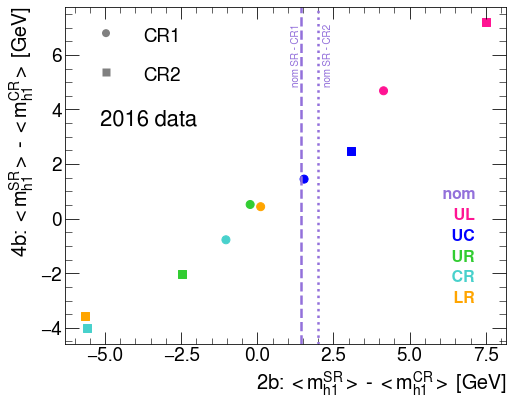

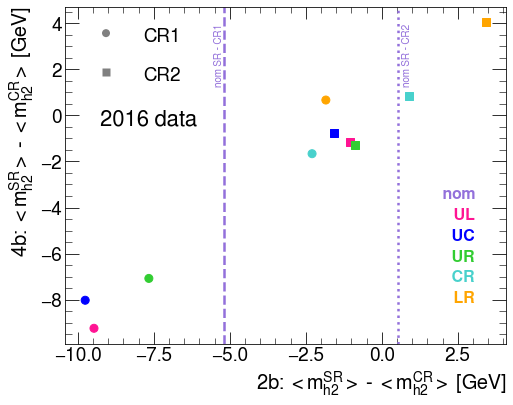

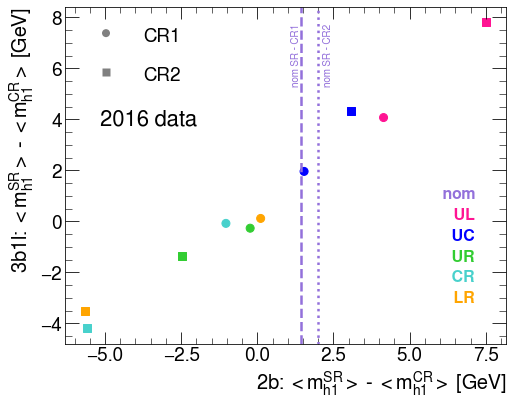

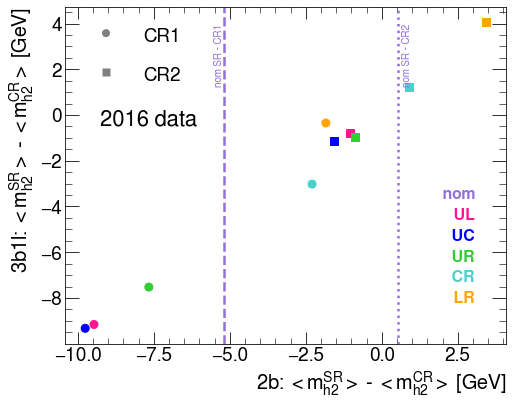

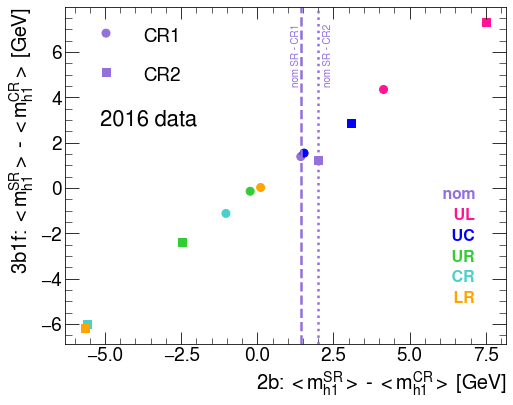

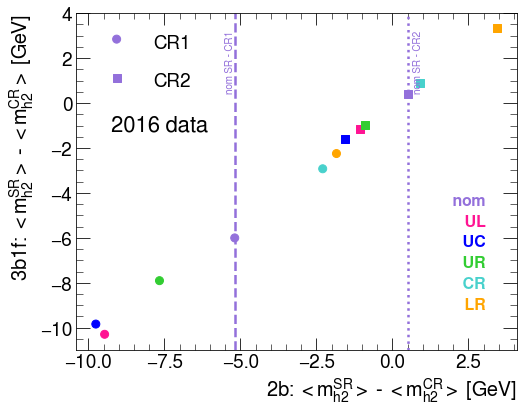

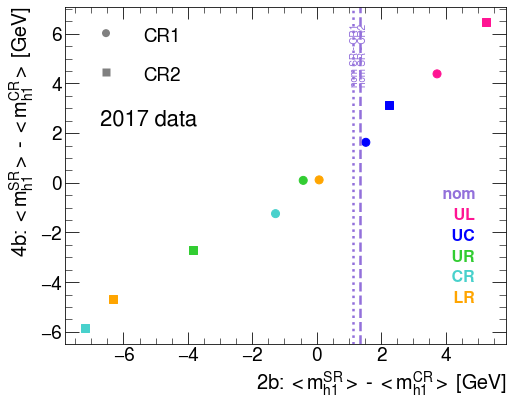

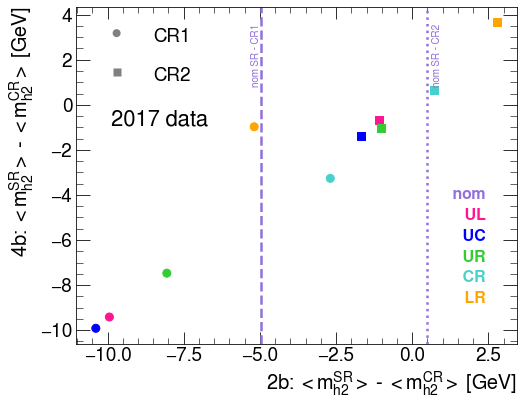

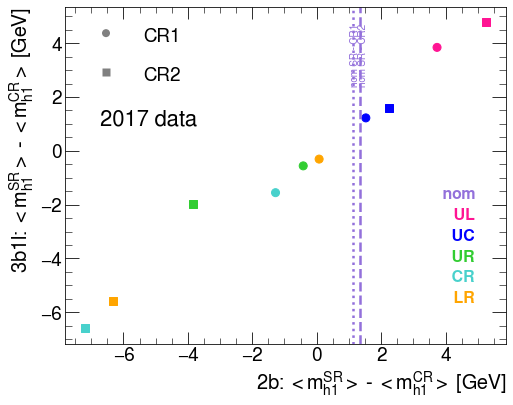

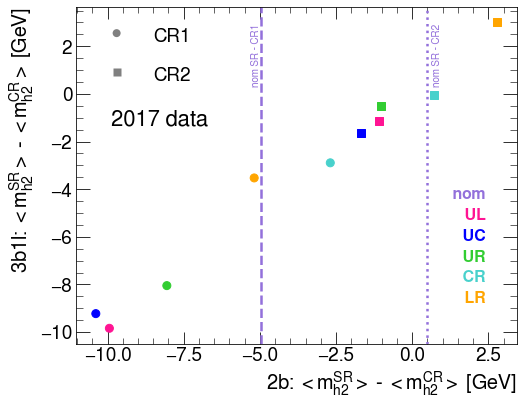

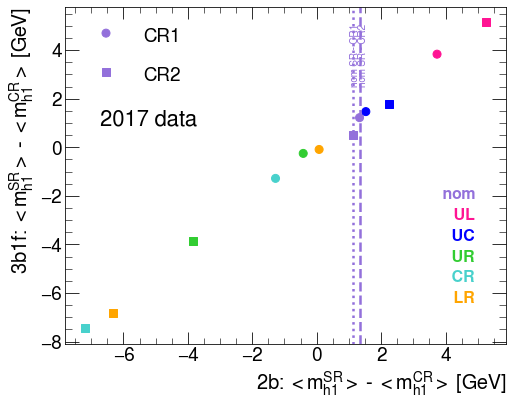

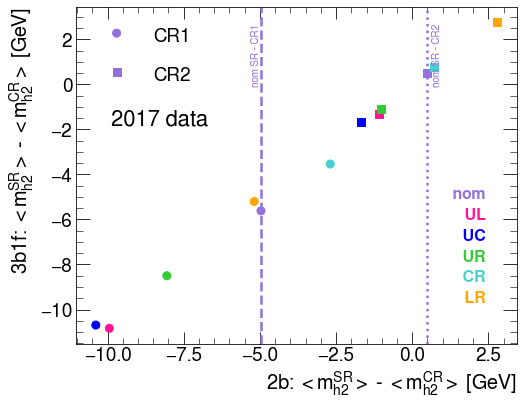

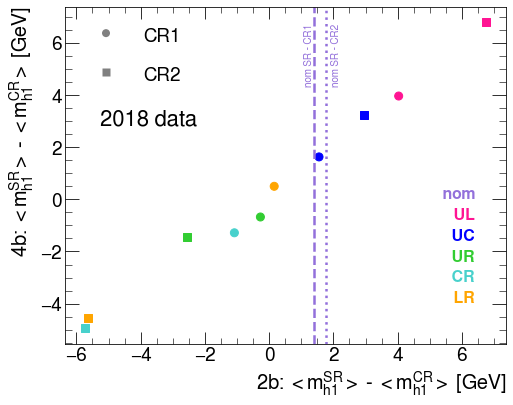

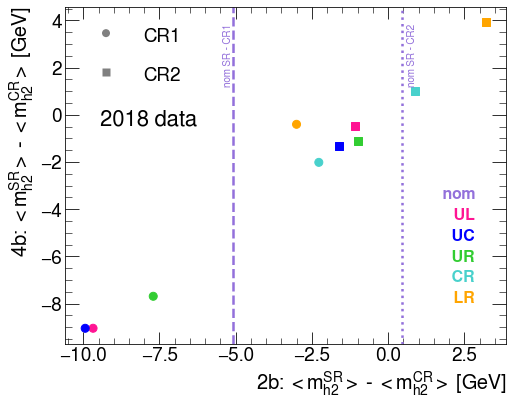

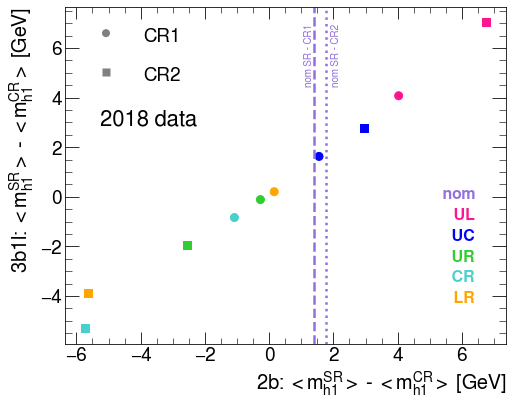

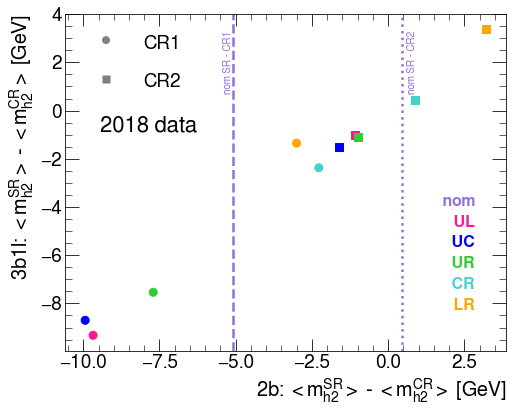

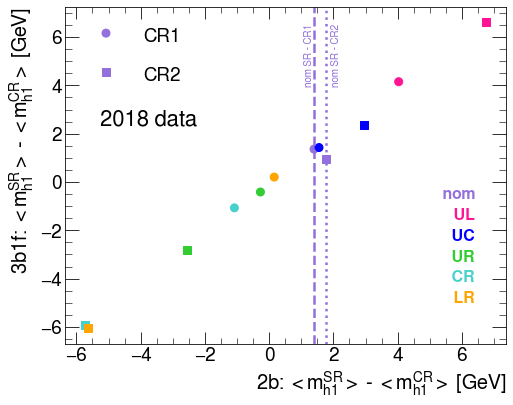

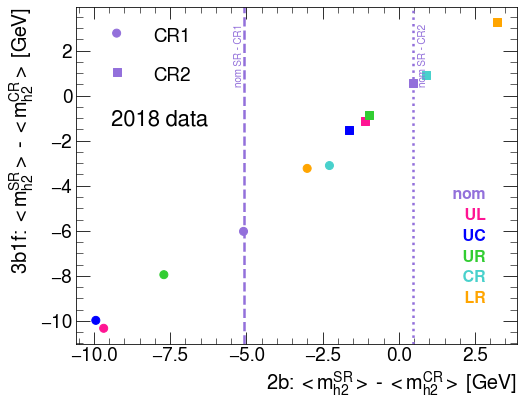

In [57]:
for yr in [16,17,18]:
    for bcat in ['4b','3b1l','3b1f']:
        for hi in [1,2]:

            plt.figure()

            # CR 1 c.f.
            x1 = postXwt.loc[yr,('2b',f'm_h{hi}','SR')]-postXwt.loc[yr,('2b',f'm_h{hi}','CR1')]
            y1 = postXwt.loc[yr,(bcat,f'm_h{hi}','SR')]-postXwt.loc[yr,(bcat,f'm_h{hi}','CR1')]

            cis = ['mediumpurple'] if bcat == '3b1f' else ['grey']
            cis = cis+colors 
            plt.scatter(x1,y1,color=cis,label='CR1')

            # CR 2 c.f.
            x2 = postXwt.loc[yr,('2b',f'm_h{hi}','SR')]-postXwt.loc[yr,('2b',f'm_h{hi}','CR2')]
            y2 = postXwt.loc[yr,(bcat,f'm_h{hi}','SR')]-postXwt.loc[yr,(bcat,f'm_h{hi}','CR2')]

            plt.scatter(x2,y2,color=cis,marker='s',label='CR2')

            ax = plt.gca()
            label = '$<m_{h'+str(hi)+'}^{SR}>$ - $<m_{h'+str(hi)+'}^{CR}>$ [GeV]'
            plt.xlabel(f'2b: {label}',    ha='right',x=1)
            plt.ylabel(f'{bcat}: {label}',ha='right',y=1)

            ax.xaxis.set_minor_locator(AutoMinorLocator())
            ax.yaxis.set_minor_locator(AutoMinorLocator())

            xlim = plt.xlim()
            ylim = plt.ylim()
            plt.plot([x1[0]]*2,ylim,color='mediumpurple',lw=2.5,ls='--')
            plt.plot([x2[0]]*2,ylim,color='mediumpurple',lw=2.5,ls='dotted')
            plt.ylim(ylim)

            plt.text(x1[0],0.95*ylim[1]+0.05*ylim[0],'nom SR - CR1',
                     color='mediumpurple',rotation=90,ha='right',va='top')
            plt.text(x2[0]+.15,0.95*ylim[1]+0.05*ylim[0],'nom SR - CR2',
                     color='mediumpurple',rotation=90,ha='left',va='top')


            plt.legend()

            xi = .93*xlim[1]+0.07*xlim[0]
            yi = .43*ylim[1]+0.57*ylim[0]
            rainbow_text(xi,yi,names,['mediumpurple']+colors,
                         fontsize=16,yoffset=1.3,ha='right',
                         fontweight='bold')

            plt.text(0.08,.65,f'20{yr} data',transform=ax.transAxes,fontsize=22)

            plt.savefig(f'figures/shiftSRs/avg_mh{hi}_2b_{bcat}_{yr}.pdf',bbox_inches='tight')

**Pop all the years on the same plot.**

In [68]:
postXwt.head()

4b                                                  \
              m_h1                                m_h2               
                SR         CR1         CR2          SR         CR1   
16 nom         NaN  123.603455  122.680931         NaN  123.241478   
   UL    80.349579   75.665306   73.152489  166.913040  176.157196   
   UC   124.639824  123.191727  122.160934  181.344193  189.370651   
   UR   170.487122  169.968567  172.520721  161.312103  168.390488   
   CR   188.178040  188.951935  192.194550  118.352730  120.015457   

                          3b1l                                      ...  \
                          m_h1                                m_h2  ...   
               CR2          SR         CR1         CR2          SR  ...   
16 nom  118.182167         NaN  123.674034  123.140717         NaN  ...   
   UL   168.054321   80.376694   76.307045   72.566208  167.012939  ...   
   UC   182.117401  124.866203  122.909058  120.552040  181.005646  ...   
   UR   162.617966  170.310074  170.580780  171.665161  160.720016  ...   
   CR   117.509232  188.450287  188.531845  192.646729  118.672104  ...   

              3b1f                                              2b  \
              m_h1        m_h2                                m_h1   
               CR2          SR         CR1         CR2          SR   
16 nom  123.923927  118.787910  124.789375  118.362236  125.073135   
   UL    73.297508  167.100845  177.392914  168.235489   80.503845   
   UC   122.085136  180.812805  190.649841  182.394638  124.858505   
   UR   172.788773  161.100159  169.004639  162.083252  170.321548   
   CR   194.297287  118.504951  121.428932  117.592201  188.279205   

                                                                    
                                      m_h2                          
               CR1         CR2          SR         CR1         CR2  
16 nom  123.646591  123.073395  118.806358  123.992416  118.280190  
   UL    76.360550   72.999733  167.092163  176.558868  168.149796  
   UC   123.323463  121.792717  180.853104  190.609207  182.426971  
   UR   170.556595  172.789673  161.036896  168.698425  161.922867  
   CR   189.309662  193.869125  118.495453  120.787483  117.588669  

[5 rows x 24 columns]

In [69]:
preXwt.head()

4b                                                  \
              m_h1                                m_h2               
                SR         CR1         CR2          SR         CR1   
16 nom         NaN  123.100845  119.431999         NaN  120.020042   
   UL    80.204330   76.206039   72.273384  166.739075  173.355316   
   UC   124.520210  122.765617  118.954117  181.124374  188.850769   
   UR   170.565811  170.022598  171.611115  161.100723  166.583878   
   CR   188.222794  188.833542  191.829681  118.284706  117.885765   

                          3b1l                                      ...  \
                          m_h1                                m_h2  ...   
               CR2          SR         CR1         CR2          SR  ...   
16 nom  117.966812         NaN  123.171837  119.864166         NaN  ...   
   UL   167.639465   80.310852   76.764069   72.160995  166.786530  ...   
   UC   182.195618  124.783875  122.488945  117.985497  180.943100  ...   
   UR   162.105423  170.196594  170.399490  170.962402  160.529541  ...   
   CR   117.249496  188.132797  188.636566  191.747208  118.663399  ...   

              3b1f                                              2b  \
              m_h1        m_h2                                m_h1   
               CR2          SR         CR1         CR2          SR   
16 nom  120.994926  118.745628  121.805031  118.356857  124.940285   
   UL    72.977013  166.982666  175.157852  167.909042   80.466492   
   UC   119.631310  180.780411  189.906601  182.450485  124.740494   
   UR   172.427872  160.910049  167.733047  161.674225  170.295670   
   CR   193.967072  118.531578  119.458458  117.516090  188.274216   

                                                                    
                                      m_h2                          
               CR1         CR2          SR         CR1         CR2  
16 nom  123.387321  120.861641  118.779755  121.717506  118.254936  
   UL    76.715004   72.825691  166.980530  175.075500  167.938400  
   UC   123.085205  119.956299  180.818329  190.169250  182.478348  
   UR   170.513870  172.572830  160.933533  167.926880  161.684998  
   CR   189.354980  193.765930  118.500084  119.352669  117.511627  

[5 rows x 24 columns]

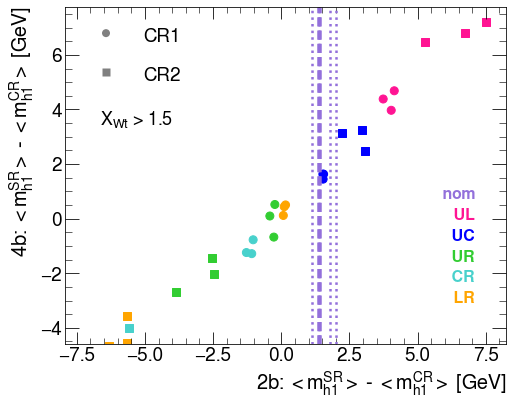

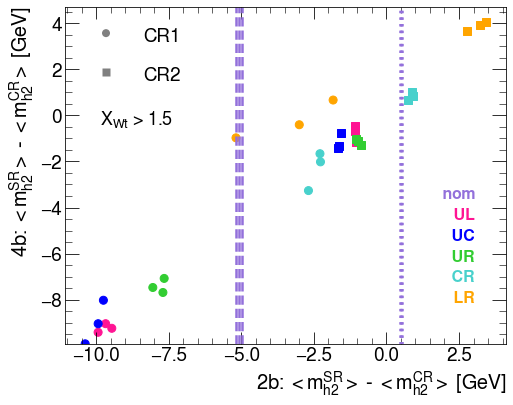

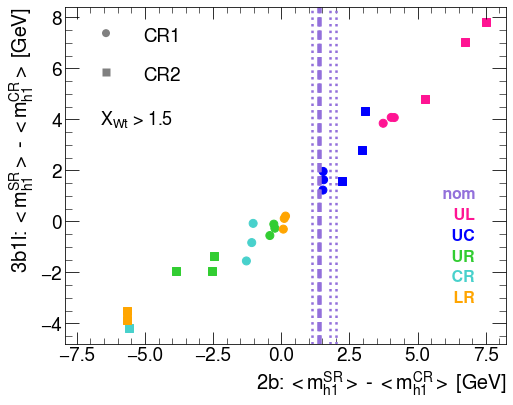

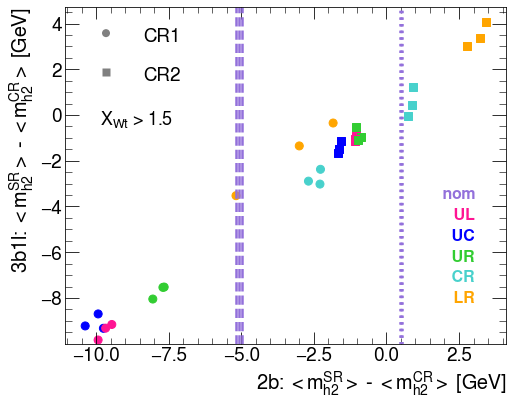

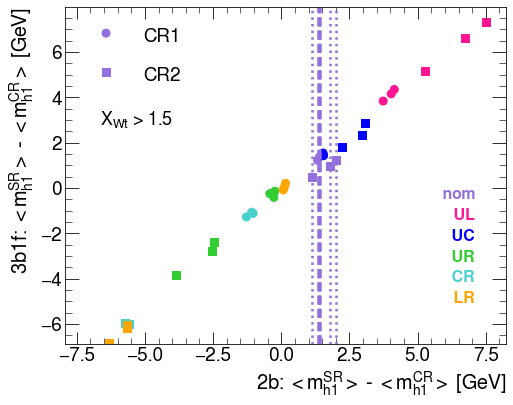

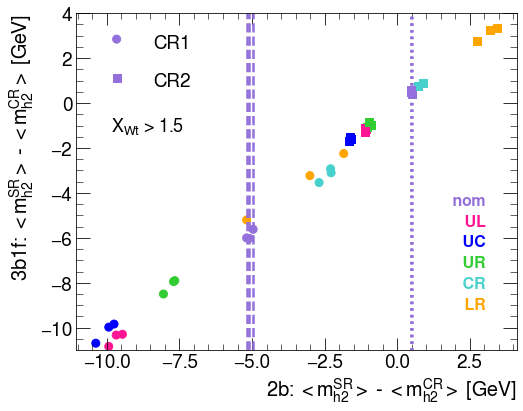

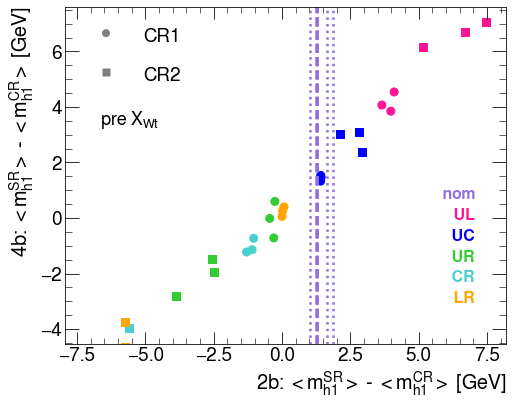

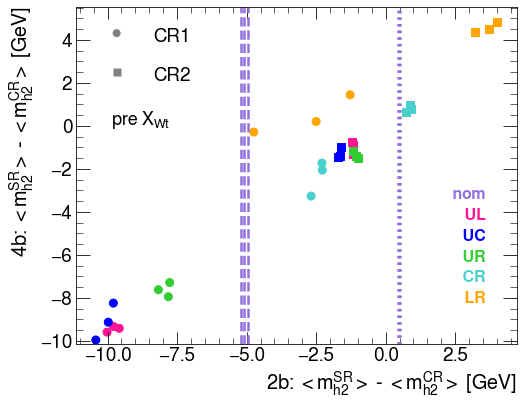

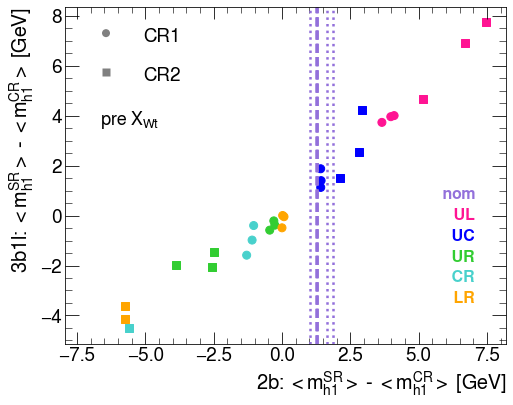

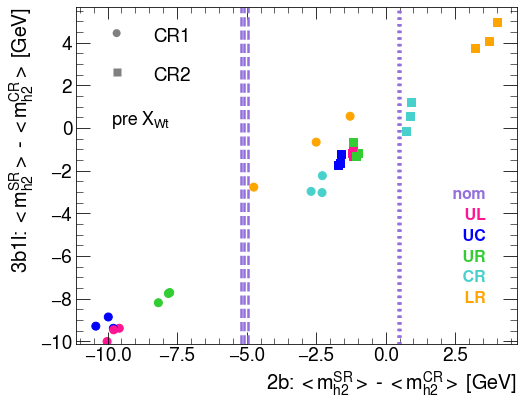

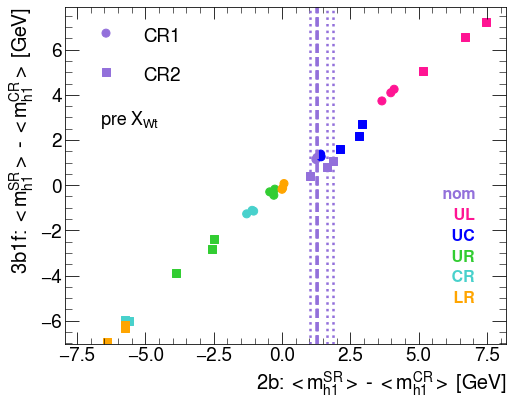

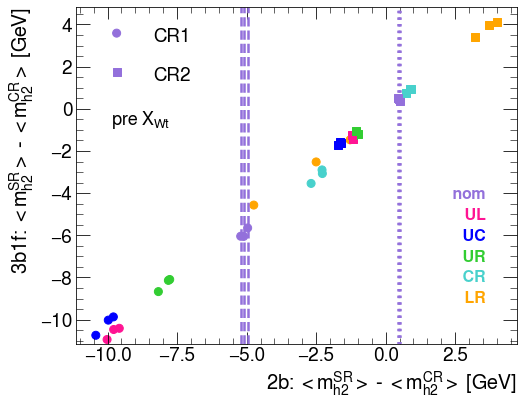

In [67]:
for dfi, text,tag in zip([postXwt,preXwt],['$X_{Wt}$ > 1.5','pre $X_{Wt}$'],['','preXwt']):
    for bcat in ['4b','3b1l','3b1f']:
        for hi in [1,2]:

            plt.figure()

            for yr in [16,17,18]:

                # CR 1 c.f.
                x1 = dfi.loc[yr,('2b',f'm_h{hi}','SR')]-postXwt.loc[yr,('2b',f'm_h{hi}','CR1')]
                y1 = dfi.loc[yr,(bcat,f'm_h{hi}','SR')]-postXwt.loc[yr,(bcat,f'm_h{hi}','CR1')]

                cis = ['mediumpurple'] if bcat == '3b1f' else ['grey']
                cis = cis+colors 
                plt.scatter(x1,y1,color=cis,label='CR1' if yr==16 else None)

                # CR 2 c.f.
                x2 = dfi.loc[yr,('2b',f'm_h{hi}','SR')]-postXwt.loc[yr,('2b',f'm_h{hi}','CR2')]
                y2 = dfi.loc[yr,(bcat,f'm_h{hi}','SR')]-postXwt.loc[yr,(bcat,f'm_h{hi}','CR2')]

                plt.scatter(x2,y2,color=cis,marker='s',label='CR2' if yr==16 else None)

                xlim = plt.xlim()
                ylim = plt.ylim()
                plt.plot([x1[0]]*2,ylim,color='mediumpurple',lw=2.5,ls='--')
                plt.plot([x2[0]]*2,ylim,color='mediumpurple',lw=2.5,ls='dotted')
                plt.ylim(ylim)

            ax = plt.gca()
            label = '$<m_{h'+str(hi)+'}^{SR}>$ - $<m_{h'+str(hi)+'}^{CR}>$ [GeV]'
            plt.xlabel(f'2b: {label}',    ha='right',x=1)
            plt.ylabel(f'{bcat}: {label}',ha='right',y=1)

            ax.xaxis.set_minor_locator(AutoMinorLocator())
            ax.yaxis.set_minor_locator(AutoMinorLocator())


            plt.legend()

            xi = .93*xlim[1]+0.07*xlim[0]
            yi = .43*ylim[1]+0.57*ylim[0]
            rainbow_text(xi,yi,names,['mediumpurple']+colors,
                         fontsize=16,yoffset=1.3,ha='right',
                         fontweight='bold')

            plt.text(0.08,.65,text,transform=ax.transAxes,fontsize=18)

            plt.savefig(f'figures/shiftSRs/avg_mh{hi}_2b_{bcat}{tag}.pdf',bbox_inches='tight')

**Conclusion:** Yes, it does!

Woah - ok, so the 4b plot seems a _great_ justificaton for why ...

../../hh4b/hh4b-plots/hh4b_plots/regions.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(((m1-center_x)/(res*m1))**2+((m2-center_y)/(res*m2))**2)
../../hh4b/hh4b-plots/hh4b_plots/hh4b_plots.py:597: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(X, Y, fn(X, Y, **fn_args),[fn_bound], colors=[color],


Text(0.05, 0.92, '2018 data')

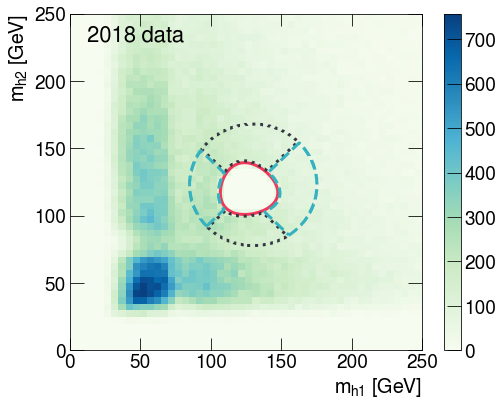

In [31]:
n = 50
r = (0,250)

mask = (~fmp.pass_vbf_sel) & (fmp.X_wt_tag > 1.5)
plt.hist2d(*fmp.loc[mask& (fmp.ntag>=4),['m_h1','m_h2']].values.T,
           50,[r,r], cmap="GnBu")
plt.colorbar()

plt.xlabel('$m_{h1}$ [GeV]',x=1,ha='right')
plt.ylabel('$m_{h2}$ [GeV]',y=1,ha='right')

ax = plt.gca()
draw_contours(ax,reg_dict,r,r)

plt.text(0.05,.92,f'20{yr} data',transform=ax.transAxes,fontsize=22)



In [37]:
hi

2

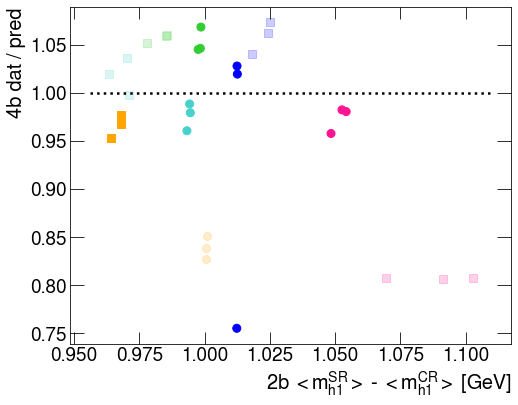

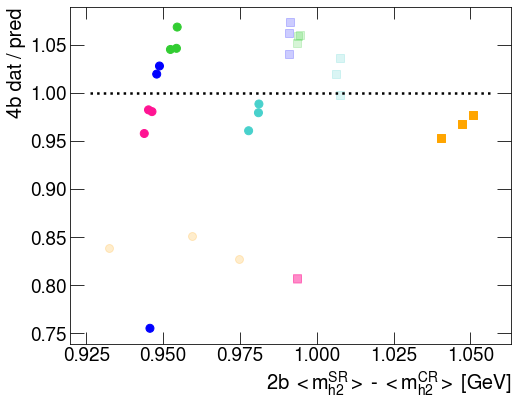

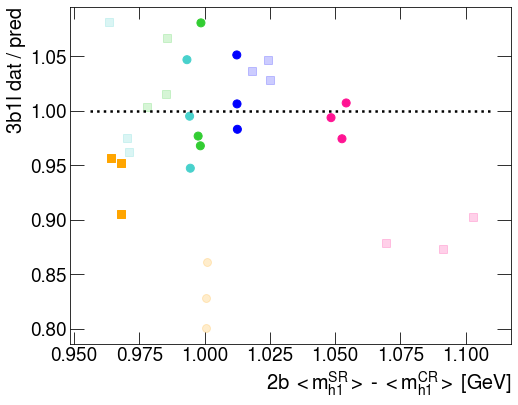

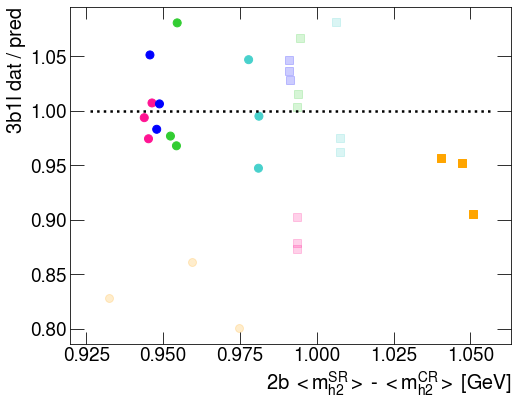

In [58]:
for bcat, hi in product(['4b','3b1l'],[1,2]):

    plt.figure()
    
    for yr in [16,17,18]:

        for l, marker in zip(['CR1','CR2'],['o','s']):
            xx = postXwt.loc[(yr,names[1:]),('2b',f'm_h{hi}','SR')] / \
                 postXwt.loc[(yr,names[1:]),('2b',f'm_h{hi}',l)]
            yy = df.loc[yr,(bcat,'dat')]/df.loc[yr,(bcat,l)]

            if l == 'CR1':
                plt.scatter( xx[:-1], yy[:-1],color=cis[1:-1],marker=marker)
                plt.scatter([xx.iloc[-1]],[yy[-1]],color=[cis[-1]],marker=marker,alpha=0.2)
            else:
                plt.scatter( xx[:-1], yy[:-1],color=cis[1:-1],marker=marker,alpha=0.2)
                plt.scatter([xx.iloc[-1]],[yy[-1]],color=[cis[-1]],marker=marker)
                
    plt.xlabel('2b $<m_{h'+str(hi)+'}^{SR}>$ - $<m_{h'+str(hi)+'}^{CR}>$ [GeV]',x=1,ha='right')
    plt.ylabel(f'{bcat} dat / pred',y=1,ha='right')


    xlim = plt.xlim()
    plt.plot(xlim,[1]*2,'k',ls='dotted',lw=2.5)
    
    plt.savefig(f'figures/shiftSRs/norm{bcat}_vs_avg_mh{hi}_2b')

I decided to set a different transparency for the ones that are considered "nominal" in the note.

In the SR, I think we expect the data to be lower than the prediction, but I think we are seeing this if we focus on the <span style="color:blue">upper center</span> and <span style="color:turquoise">center right</span> dots (the predictions that will be closest to our actual SR.

### Next: Propose what the new CR radius should be!

I have the fullmassplanes already loaded in this notebook, so I _think_ that it makes sense to do this here?
